In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Conv2DTranspose, Conv2D
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def build_generator():
    model = Sequential([
        Dense(8 * 8 * 512, activation="relu", input_dim=100),
        Reshape((8, 8, 512)),
        Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(3, kernel_size=4, strides=2, activation="tanh", padding="same"),
    ])
    return model

generator = build_generator()
generator.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32768)             3309568   
                                                                 
 reshape (Reshape)           (None, 8, 8, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 256)       2097408   
 anspose)                                                        
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 128)       524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 128)       0

In [ ]:
def build_discriminator():
    model = Sequential([
        Conv2D(64, kernel_size=4, strides=2, padding="same", input_shape=(64, 64, 3)),
        LeakyReLU(alpha=0.2),
        Conv2D(128, kernel_size=4, strides=2, padding="same"),
        LeakyReLU(alpha=0.2),
        Conv2D(256, kernel_size=4, strides=2, padding="same"),
        LeakyReLU(alpha=0.2),
        Conv2D(512, kernel_size=4, strides=2, padding="same"),
        LeakyReLU(alpha=0.2),
        Dense(1, activation="sigmoid"),
    ])
    return model

discriminator = build_discriminator()
discriminator.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         524544    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 8, 8, 256)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 512)        

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
generator.compile(loss="binary_crossentropy", optimizer="adam")


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, Conv2DTranspose

def build_generator():
    model = Sequential([
        Dense(8 * 8 * 256, activation="relu", input_shape=(100,)),  # Start with 8x8
        Reshape((8, 8, 256)),
        Conv2DTranspose(128, kernel_size=4, strides=2, padding="same", activation="relu"),
        Conv2DTranspose(64, kernel_size=4, strides=2, padding="same", activation="relu"),
        Conv2DTranspose(3, kernel_size=4, strides=2, padding="same", activation="tanh")  # 64x64x3 output
    ])
    return model

generator = build_generator()




In [ ]:
def build_discriminator():
    model = Sequential([
        Conv2D(64, kernel_size=4, strides=2, padding="same", input_shape=(64, 64, 3)),
        LeakyReLU(alpha=0.2),
        Conv2D(128, kernel_size=4, strides=2, padding="same"),
        LeakyReLU(alpha=0.2),
        Conv2D(256, kernel_size=4, strides=2, padding="same"),
        LeakyReLU(alpha=0.2),
        Flatten(),  # Ensure it's flattened to (batch_size, X)
        Dense(1, activation="sigmoid")  # Output a single probability (real/fake)
    ])

    # ✅ Add this line to compile the discriminator
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 128)       131200    
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 8, 256)         524544    
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 8, 8, 256)         0         
                                                                 
 flatten_3 (Flatten)         (None, 16384)            

In [ ]:
import numpy as np

# Compile the generator
generator.compile(loss="binary_crossentropy", optimizer="adam")

def train_gan(generator, discriminator, epochs=10000, batch_size=64):
    for epoch in range(epochs):
        # Generate fake images
        noise = np.random.normal(0, 1, (batch_size, 100))  # 100 is latent space size
        fake_images = generator.predict(noise)  # Shape: (batch_size, 64, 64, 3)

        # Generate real images (using random noise for simplicity)
        real_images = np.random.rand(batch_size, 64, 64, 3)  # Shape: (batch_size, 64, 64, 3)

        # Train Discriminator
        real_labels = np.ones((batch_size, 1))  # Real images should be labeled as 1
        fake_labels = np.zeros((batch_size, 1))  # Fake images should be labeled as 0
        real_labels = np.reshape(real_labels, (batch_size, 1))
        fake_labels = np.reshape(fake_labels, (batch_size, 1))
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator (wants discriminator to think its images are real)
        g_loss = generator.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print progress
        if epoch % 1000 == 0:
            print(f"Epoch {epoch} | D Loss: {d_loss} | G Loss: {g_loss}")

# Train the GAN
train_gan(generator, discriminator)


2/2 [==============================] - 0s 55ms/step
Epoch 0 | D Loss: [2.48253236e-05 1.00000000e+00] | G Loss: 11.122152328491211
2/2 [==============================] - 0s 53ms/step


KeyboardInterrupt: 

1/1 [==============================] - 0s 223ms/step


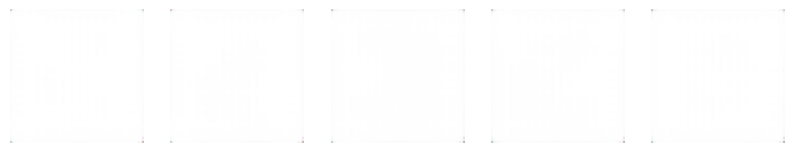

In [ ]:
def generate_images(generator, num_images=5):
    noise = np.random.normal(0, 1, (num_images, 100))
    images = generator.predict(noise)
    
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow((images[i] * 127.5 + 127.5).astype(np.uint8))
        plt.axis("off")
    plt.show()

# Generate sample images
generate_images(generator)
